In [1]:
# Import libraries
import matplotlib.pyplot as plt # Matplotlib is used for plotting
import pandas as pd             # Pandas helps organize data structures
import numpy as np              # Numpy provides mathematical functions like sqrt()
import statsmodels.formula.api as smf  # Statsmodel provides linear regression

In [2]:
# # Load climate data from CRU: https://crudata.uea.ac.uk/cru/data/hrg/cru_ts_4.03/
## NOTE: We have already downloaded and prepared the data and saved it to a CSV. You do NOT
# need to run the commented code below. We include it here just for your reference,
# so you can see how the data was prepared ("wrangled" in the)

# country='all'
# data_temp=pd.read_fwf('https://crudata.uea.ac.uk/cru/data/hrg/cru_ts_4.03/crucy.1905151143.v4.03/new_countries/tmp/crucy.v4.03.1901.2018.'+country+'.tmp.per',
#                 header=0, 
#                 skiprows=3)
# data_wet=pd.read_fwf('https://crudata.uea.ac.uk/cru/data/hrg/cru_ts_4.03/crucy.1905151143.v4.03/new_countries/wet/crucy.v4.03.1901.2018.'+country+'.wet.per',
#                 header=0, 
#                 skiprows=3)
# data_cloud=pd.read_fwf('https://crudata.uea.ac.uk/cru/data/hrg/cru_ts_4.03/crucy.1905151143.v4.03/new_countries/cld/crucy.v4.03.1901.2018.'+country+'.cld.per',
#                 header=0, 
#                 skiprows=3)

# data = pd.merge(data_temp[['YEAR','JAN']], data_wet[['YEAR','ANN']],
#                 on='YEAR')
# data = pd.merge(data, data_cloud[['YEAR','ANN']],
#                 on='YEAR')
# data.rename(columns={'JAN':'Temp','ANN_x':'Wet','ANN_y':'Cloud'}, inplace=True)
# data.head()
# data.to_csv('./HW2_climate.csv')

In [6]:
data=pd.read_csv('HW2_climate.csv')

# Create a binary variable with values 0 or 1, encoding whether the mean temp is > 5.7
data['HighTemp'] = 0;
data.loc[data['Temp']>5.7,'HighTemp'] = 1;
data.head()

,Unnamed: 0,YEAR,Temp,Wet,Cloud,HighTemp
0,0,1901,5.0,110.5,54.7,0
1,1,1902,5.4,110.1,54.6,0
2,2,1903,5.2,111.1,54.9,0
3,3,1904,4.6,110.8,54.7,0
4,4,1905,5.1,111.1,55.0,0


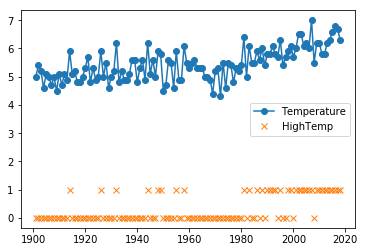

In [7]:
plt.plot(data['YEAR'],data['Temp'], 'o-')
plt.plot(data['YEAR'], data['HighTemp'], 'x')
plt.legend(['Temperature','HighTemp'])

In [10]:
# Logistic regression using a formula
mdl=smf.logit(formula='HighTemp ~ 1+YEAR + Wet', data=data).fit()
print(mdl.summary())

Optimization terminated successfully.
         Current function value: 0.384399
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               HighTemp   No. Observations:                  118
Model:                          Logit   Df Residuals:                      115
Method:                           MLE   Df Model:                            2
Date:                Mon, 14 Oct 2019   Pseudo R-squ.:                  0.3751
Time:                        10:40:35   Log-Likelihood:                -45.359
converged:                       True   LL-Null:                       -72.583
                                        LLR p-value:                 1.502e-12
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -50.3448     23.929     -2.104      0.035     -97.244      -3.446
YEAR           0.0592      0.

Text(0, 0.5, 'High Temperature')

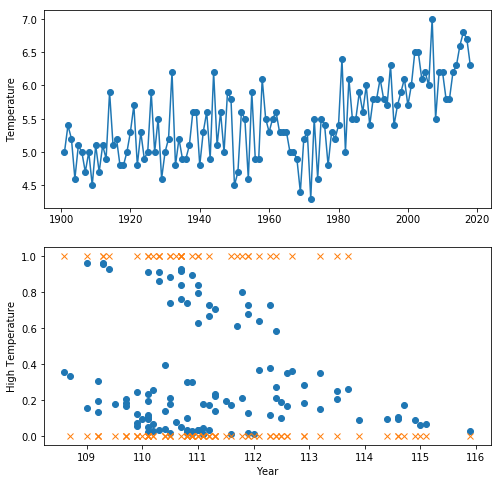

In [14]:
fig, axs = plt.subplots(2,1, figsize=(8,8))
axs[0].plot(data['YEAR'], data['Temp'],'o-')
axs[0].set_ylabel('Temperature')

axs[1].plot(data['Wet'], mdl.predict(), 'o')
axs[1].plot(data['Wet'], data['HighTemp'], 'x')
plt.xlabel('Year')
plt.ylabel('High Temperature')